# Explore Exercises

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import nltk.sentiment
import re

import acquire
import prepare

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=14)
plt.style.use('seaborn-darkgrid')

In [3]:
df = pd.read_csv("spam_clean.csv")

In [4]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

Text(0.5, 0, 'Number of occurances')

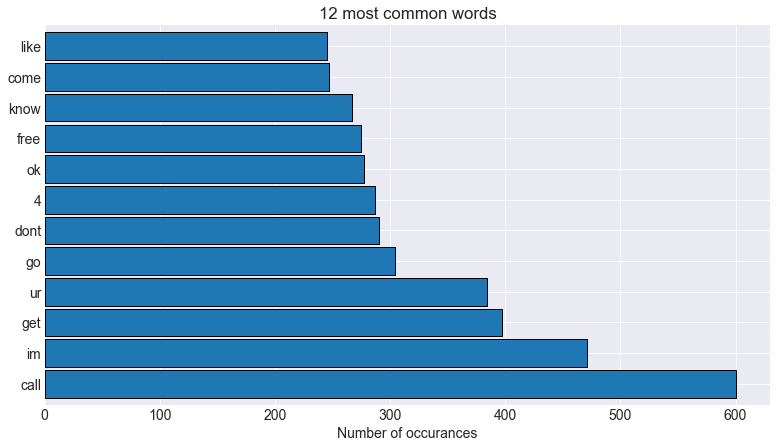

In [6]:
pd.Series(all_words).value_counts().head(12).plot.barh(width=.9, ec='black', title='12 most common words')
plt.xlabel('Number of occurances')

In [7]:
all_freq = pd.Series(all_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()

In [8]:
word_counts = pd.concat([
    all_freq,
    ham_freq,
    spam_freq,
], axis=1)
word_counts = word_counts.fillna(0).astype(int)
word_counts.columns = ['all', 'ham', 'spam']
word_counts

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1
...,...,...,...
zoe,2,1,1
zogtorius,1,1,0
zoom,1,1,0
zouk,1,0,1


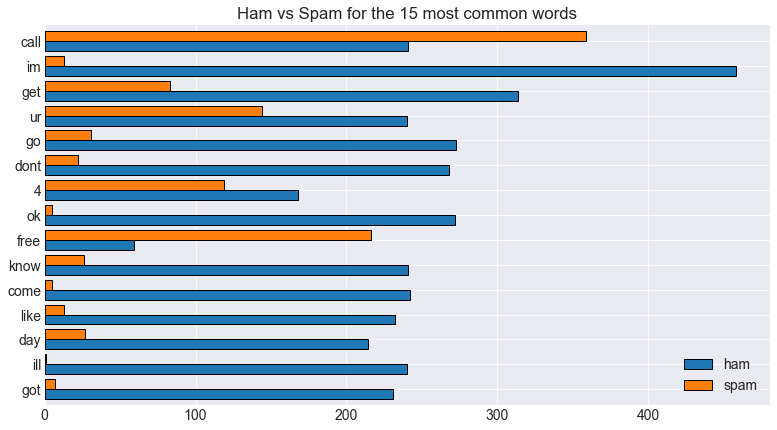

In [9]:
most_common_words = word_counts.sort_values(by='all').tail(15)
most_common_words.drop(columns='all').plot.barh(width=.8, ec='black', title='Ham vs Spam for the 15 most common words')

## 2. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [10]:
pd.Series(nltk.bigrams(spam_words)).value_counts()

(please, call)         44
(customer, service)    27
(1000, cash)           25
(po, box)              24
(guaranteed, call)     23
                       ..
(win, lotr)             1
(age16, 2stop)          1
(85555, 16)             1
(simple, shot)          1
(30apr, 1)              1
Length: 6854, dtype: int64

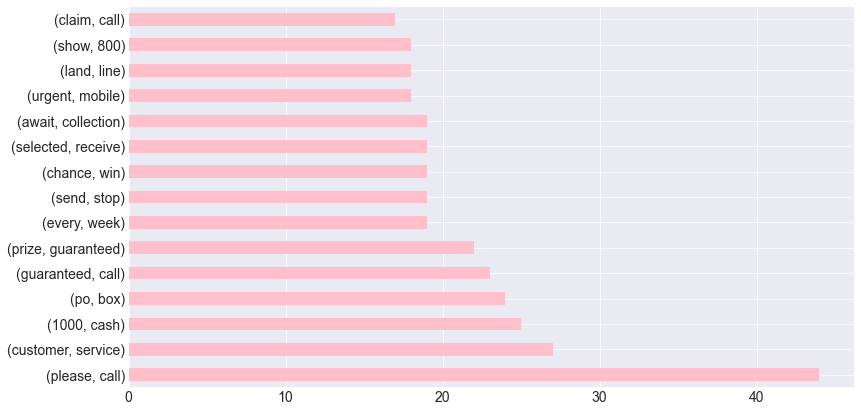

In [11]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(15).plot.barh(color='pink')

In [12]:
pd.Series(nltk.bigrams(ham_words)).value_counts()

(call, later)       52
(ill, call)         48
(let, know)         42
(sorry, ill)        39
(dont, know)        33
                    ..
(drunkard, hair)     1
(said, website)      1
(buff, wind)         1
(fuck, sip)          1
(best, mate)         1
Length: 30763, dtype: int64

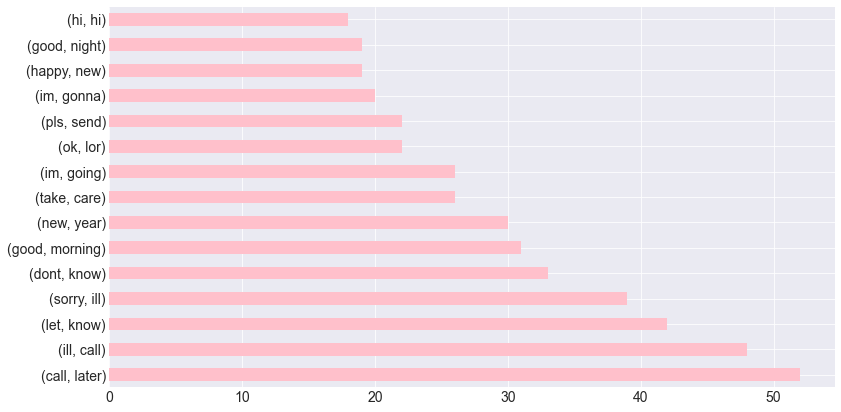

In [13]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(15).plot.barh(color='pink')

It seems that the biggest difference in terms of most common words for spam messages center around either winning a price, or urging users to take some action (like call a specific number). 

Ham messages, on the other hand, focus a lot more on more personal messages.

## 3. Is there any overlap in the bigrams for the spam data and the ham data?

One of the key words is probably that `call` would show predominantly in both, so it couldn't simply be used to predict if a message is spam or not. However, when looking at the bigrams, we see that there are patterms that can help us better determine the context. For example, if `call` is followed by `later`, there is a higher chance that this message is not spam. While if `call` is preceeded by `please` or `guarantee`, there is a higher chance that it is spam. 

## 4. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


In [14]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
                              ..
(story, girl, waiting)         1
(see, getting, wet)            1
(valid, 12hrs, sport)          1
(barkley, crazy, ringtone)     1
(goal, arsenal, 4)             1
Length: 8082, dtype: int64

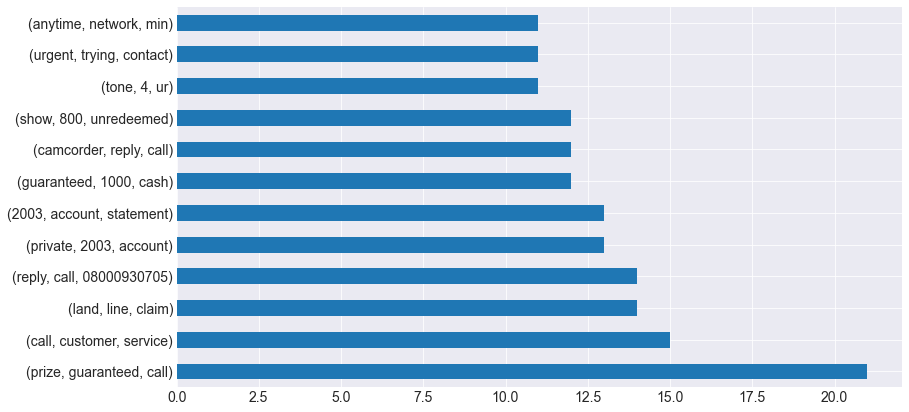

In [15]:
pd.Series(nltk.ngrams(spam_words, 3)).value_counts().head(12).plot.barh()

In [16]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts()

(ill, call, later)          42
(sorry, ill, call)          38
(happy, new, year)          19
(pls, send, message)        13
(right, pls, send)          12
                            ..
(thought, xuhui, told)       1
(survey, lol, ok)            1
(go, plaza, mah)             1
(finish, lunch, way)         1
(training, manual, show)     1
Length: 35176, dtype: int64

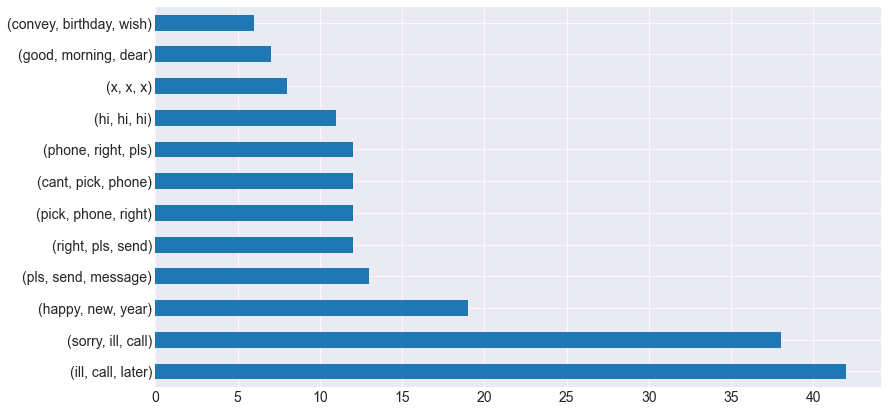

In [17]:
pd.Series(nltk.ngrams(ham_words, 3)).value_counts().head(12).plot.barh()

Again, we see that spam messages use words that are trying to create an action from the user, like `urgent`, `call` or `reply`. Also, spam messages tend to focus a lot more on redeeming some sort of prize, seems that cash is the most common thing. 

Ham messages, on the other hand, have more spelling mistakes, as well as abbreviations. Additionally, messages tend to be more personal, involing things like `birthday` messages, or `x`.

## Codeup Blog Articles

Explore the blog articles using the techniques discussed in the exploration lesson.

In [18]:
df = pd.read_csv("codeup_blog_articles.csv")

df = df.drop(columns = ['Unnamed: 0'])

df["date_published"] = pd.Series(df.date_published).str.extract(r"[^.+\"]\"(?P<date>\d+-\d+-\d+)")

df.date_published = pd.to_datetime(df.date_published)

In [19]:
# articles = prepare.prepare_article_data(df)

### Exploration of titles in Codeup Blogs

In [20]:
ADDITIONAL_STOPWORDS = ["codeup"]

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [21]:
# all_words = clean(' '.join(df.text))
titles = clean(' '.join(df.title))

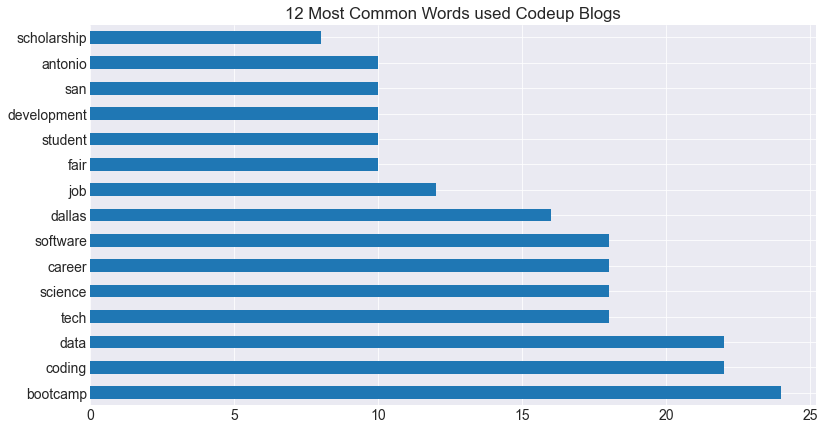

In [22]:
pd.Series(titles).value_counts().head(15).plot.barh(title="12 Most Common Words used Codeup Blogs")

Surprisignly - even though the blogs are about both data science and web dev, data is mentioned way more than web development. 

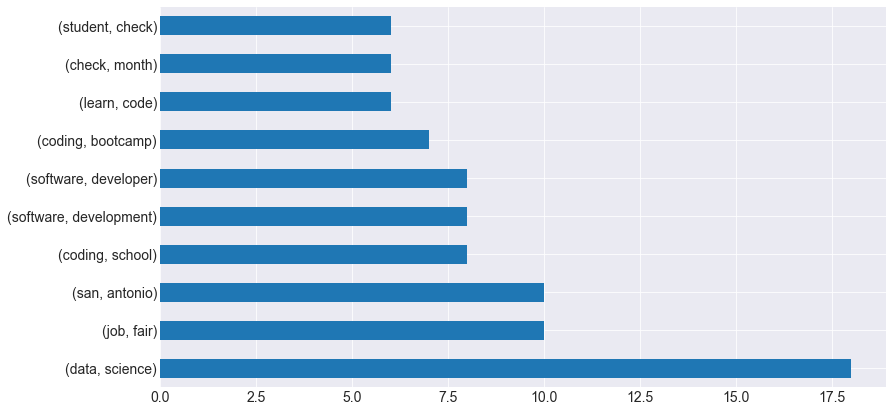

In [23]:
pd.Series(nltk.bigrams(titles)).value_counts().head(10).plot.barh()

It seems that data science might be mention more commonly than software development. 

In [24]:
df

,title,content,date_published
0,From Bootcamp to Bootcamp: Veterans Transition...,Are you a veteran or active-duty military memb...,2020-05-22
1,From Bootcamp to Bootcamp: Veterans Transition...,Are you a veteran or active-duty military memb...,2020-05-22
2,How to Get Started On Any Programming Exercise...,Programming is hard. Whether you’re just begin...,2020-05-18
3,How to Get Started On Any Programming Exercise...,Programming is hard. Whether you’re just begin...,2020-05-18
4,The Best Path to a Career in Data Science - Co...,"In our blog, “The Best Path To A Career In Sof...",2020-05-14
...,...,...,...
193,Why Choose Codeup? - Codeup,Why Choose Codeup?Prospective students sometim...,2018-08-14
194,Use Your Texas Unemployment Benefits at Codeup...,Use Your Texas Unemployment Benefits at Codeup...,2018-08-14
195,Use Your Texas Unemployment Benefits at Codeup...,Use Your Texas Unemployment Benefits at Codeup...,2018-08-14
196,"Q&A with Luis Martinez, Director of Entreprene...","Q&A with Luis Martinez, Director of Entreprene...",2018-08-14


In [25]:
stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS

In [26]:
def most_frequent_word(s: pd.Series) -> str:
    # your code might be more or less complicated here, depending on how much
    # text prep you've already done or more you want to do in this function
    words = clean(' '.join(s))
    most_common_word = pd.Series(words).value_counts().head(1).index
    return most_common_word

In [27]:
most_frequent_word(df.content)

Index(['data'], dtype='object')

In [28]:
most_common_words = df.set_index('date_published').resample('W').content.agg([most_frequent_word, "count"])

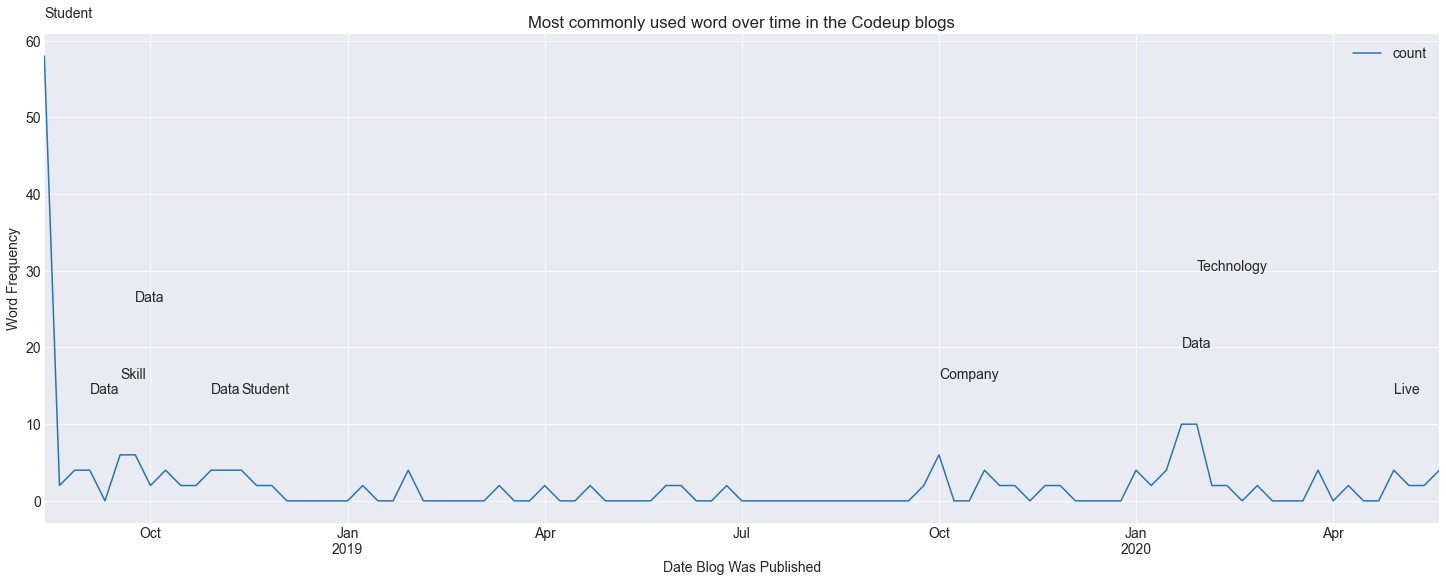

In [29]:
fig, ax = plt.subplots(figsize=(25, 9))
most_common_words.plot(ax=ax)
plt.title("Most commonly used word over time in the Codeup blogs")
plt.xlabel("Date Blog Was Published")
plt.ylabel("Word Frequency")
ax.text(f"{most_common_words.index[0]}", most_common_words["count"][0] + 5,  f"{most_common_words.most_frequent_word[0].title()}")

for i in range(1, most_common_words.shape[0]):
    if most_common_words["count"][i] >= 5 and i % 2 == 0:
        ax.text(f"{most_common_words.index[i]}", most_common_words["count"][i] + 20,  f"{most_common_words.most_frequent_word[i].title()}")
    elif most_common_words["count"][i] >= 4 and i % 2 != 0:  
        ax.text(f"{most_common_words.index[i]}", most_common_words["count"][i] + 10,  f"{most_common_words.most_frequent_word[i].title()}")

In [30]:
ADDITIONAL_STOPWORDS = ["codeup", "Codeup"]

def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [31]:
def most_frequent_bigram(s: pd.Series) -> str:
    # your code might be more or less complicated here, depending on how much
    # text prep you've already done or more you want to do in this function
    words = clean(' '.join(s))
    most_common_bigram = pd.Series(nltk.bigrams(words)).value_counts().head(1).index
    return most_common_bigram

In [63]:
df = pd.read_csv("codeup_blog_articles.csv")

df = df.drop(columns = ['Unnamed: 0'])

df["date_published"] = pd.Series(df.date_published).str.extract(r"[^.+\"]\"(?P<date>\d+-\d+-\d+)")

df.date_published = pd.to_datetime(df.date_published)

In [ ]:
most_common_bigrams = df.set_index('date_published').resample('W').content.agg([most_frequent_bigram, "count"])

In [56]:
most_common_bigrams.nlargest(5, columns="count")

,most_frequent_bigram,count
date_published,,
2018-08-19,"(san, antonio)",58
2020-01-26,"(data, science)",10
2020-02-02,"(software, developer)",10
2018-09-23,"(skill, fund)",6
2018-09-30,"(data, science)",6


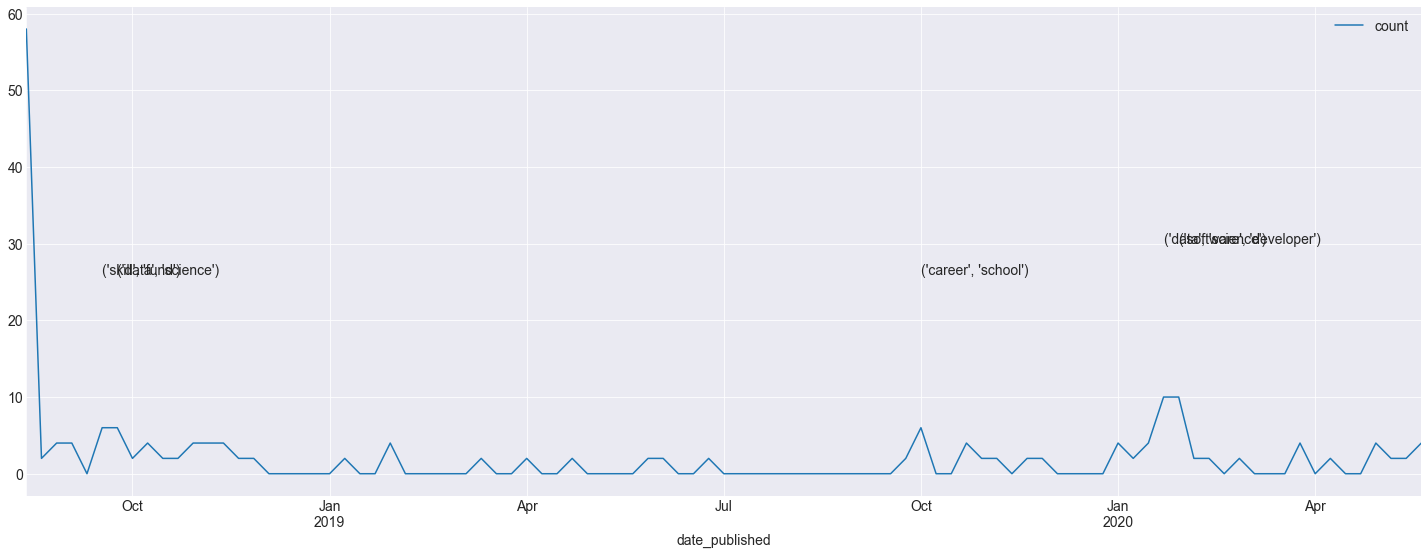

In [61]:
fig, ax = plt.subplots(figsize=(25, 9))
most_common_bigrams.plot(ax=ax)
for i in range(1, most_common_bigrams.shape[0]):
    if most_common_bigrams["count"][i] > 5:
        ax.text(f"{most_common_bigrams.index[i]}", most_common_bigrams["count"][i] + 20,  f"{most_common_bigrams.most_frequent_bigram[i]}")

## Codeup Sentiment Analysis

In [37]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [67]:
df["sentiment"] = df.title.apply(lambda blog: sia.polarity_scores(blog)["compound"])

In [73]:
df.nlargest(10, columns="sentiment").title.unique()

array(["Don't worry - Here's the Best Bootcamp Funding Options! - Codeup",
       'Finding the Perfect Coding Bootcamp Fit for Me - Codeup',
       'Codeup Helps Rails Girls Help Women Learn to Code in San Antonio - Codeup',
       'The Best Path to a Career in Data Science - Codeup',
       'The Best Path To A Career In Software Development - Codeup'],
      dtype=object)

In [40]:
df.title.loc[176]

"Don't worry - Here's the Best Bootcamp Funding Options! - Codeup"

Text(2018-08-14 00:00:00, 0.6486, 'Codeup Helps Rails Girls Help Women Learn to Code in San Antonio - Codeup')

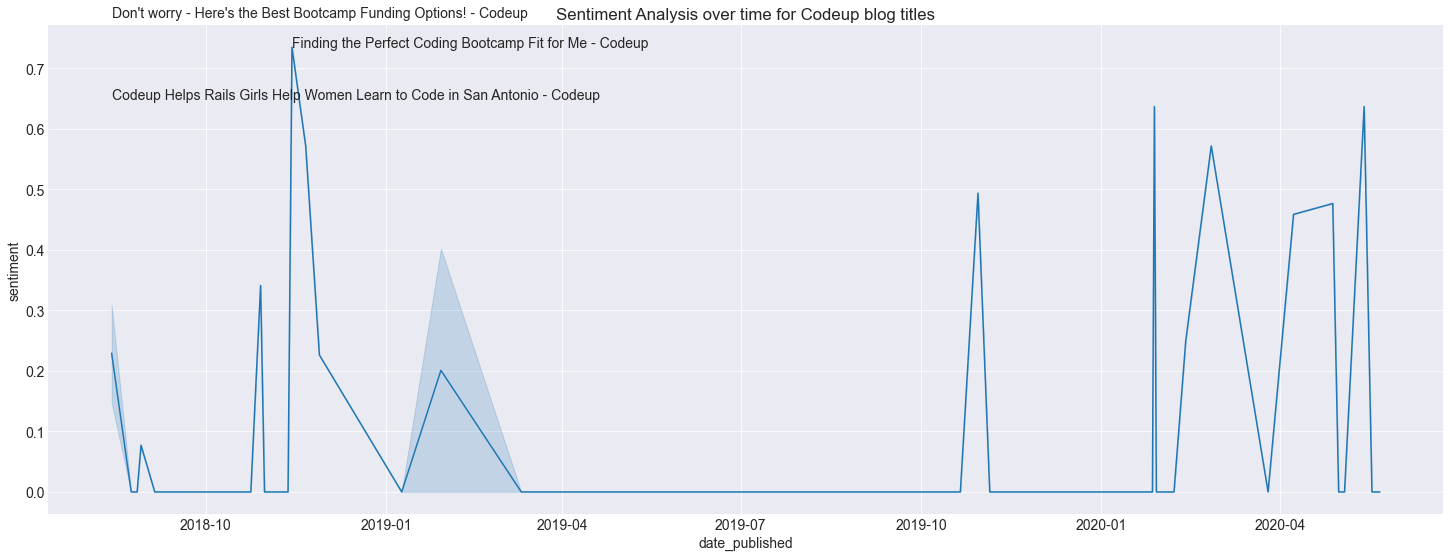

In [41]:
fig, ax = plt.subplots(figsize=(25, 9))
sns.lineplot(data=df, x="date_published", y="sentiment")
plt.title("Sentiment Analysis over time for Codeup blog titles")


ax.text(f"{df.date_published.loc[176]}", df.sentiment.loc[176],  f"{df.title.loc[176]}")
ax.text(f"{df.date_published.loc[96]}", df.sentiment.loc[96],  f"{df.title.loc[96]}")
ax.text(f"{df.date_published.loc[182]}", df.sentiment.loc[182],  f"{df.title.loc[182]}")

## Inshort Articles Sentiment Analysis

In [42]:
df = acquire.get_news_articles(topics = ["business", "sports", "technology"])

In [43]:
df = prepare.prepare_article_data(df)

In [44]:
data = pd.DataFrame(df)

In [45]:
data.date_published = pd.to_datetime(data.date_published)

In [46]:
test = data.clean[0]

In [47]:
sia.polarity_scores(test)

{'neg': 0.081, 'neu': 0.919, 'pos': 0.0, 'compound': -0.4767}

In [48]:
data["sentiment"] = data.clean.apply(lambda article: sia.polarity_scores(article)["compound"])

Text(0.5, 1.0, 'Sentiment Analysis in Inshort card by topic')

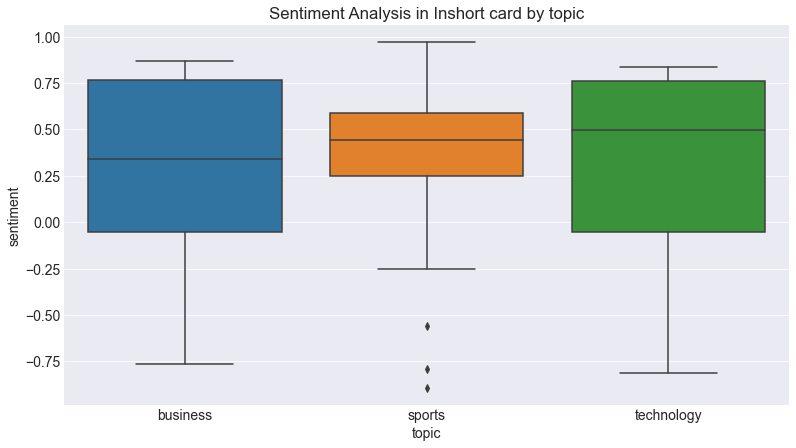

In [49]:
sns.boxplot(data=data, x="topic", y="sentiment")
plt.title("Sentiment Analysis in Inshort card by topic")

It seems that, overall, that the majority of articles have a neautral sentiment (which is expected given the nature of the articles). However, there are definitively some outliers on both ends. Sports seems to be the most positive topic, overall, while business seems to be the lowest performing topic.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

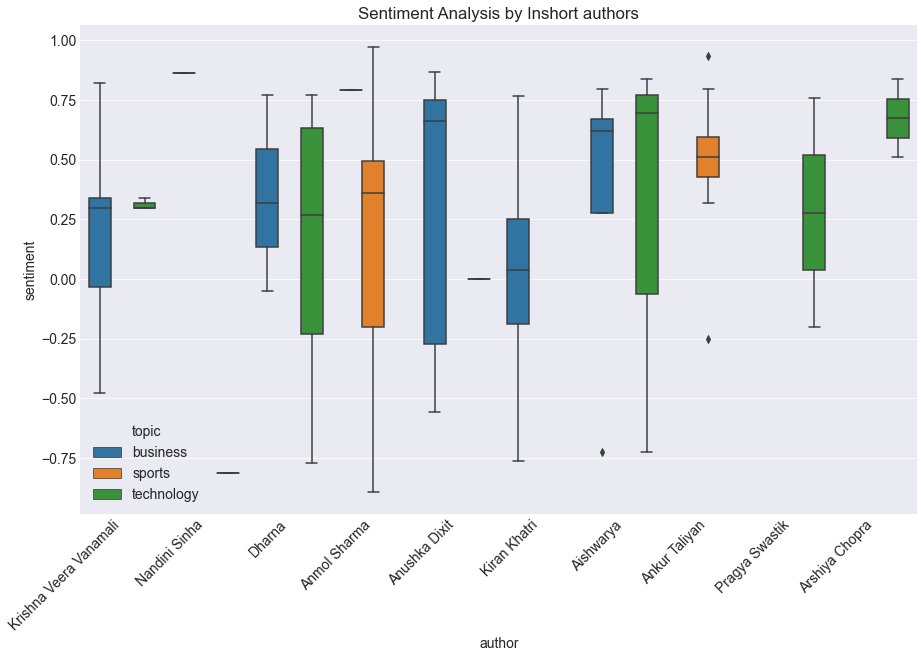

In [50]:
plt.figure(figsize=(15, 9))
sns.boxplot(data=data, x="author", y="sentiment", hue = "topic")
plt.title("Sentiment Analysis by Inshort authors")
plt.xticks(rotation=45, ha="right")

In [51]:
most_frequent_word(data.clean)

Index(['ha'], dtype='object')